In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

PROBELEM STATEMENT
1. Predict the percentage of an Student based on the no. of study hours
2. What will be the predicted score  if a student studies for 9.25 hours/day

### DEFINING DATAFRAME

In [8]:
df = pd.read_csv('score.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### EDA -- EXPLORATORY DATA ANALYSIS


In [6]:
rows, cols = df.shape
print('Rows =    ', rows)
print('columns = ', cols)

Rows =     25
columns =  2


In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# checking for unique values
df.nunique()

Hours     23
Scores    23
dtype: int64

In [11]:
# number of null values in each columns
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
# no. of null values in each dataset
df.isnull().sum().sum()

0

In [13]:
# statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

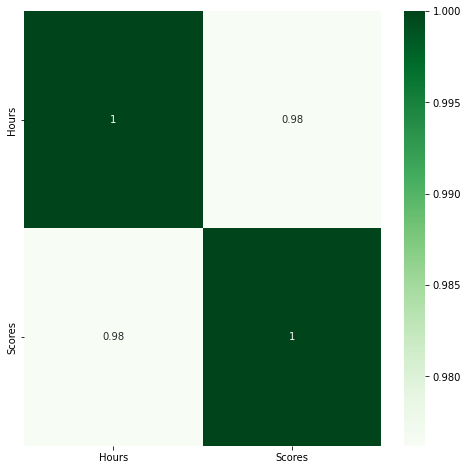

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True , cmap='Greens')

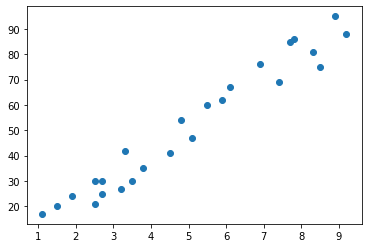

In [17]:
plt.scatter(df.Hours, df.Scores)

<AxesSubplot:>

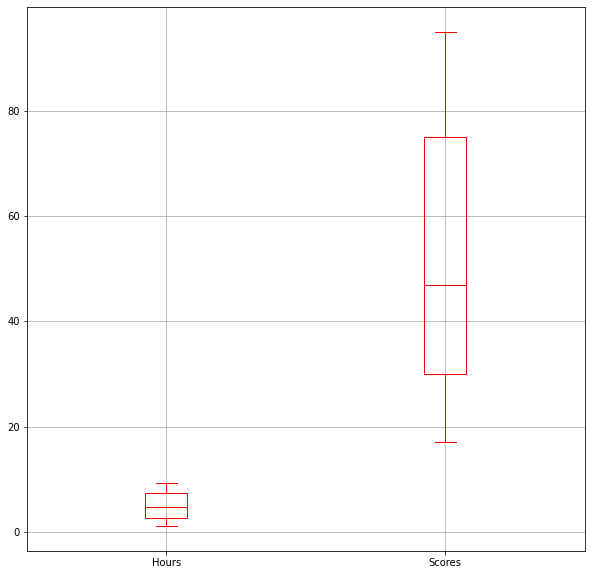

In [64]:
plt.figure(figsize=(10,10))
df.boxplot(color='red')

# Spliting the dataset

In [42]:
X=df[['Hours']]
y=df['Scores']

In [43]:
X_train, X_test , y_train , y_test =train_test_split(X,y,test_size=0.2 , random_state=42)

# Choosing the model

In [44]:

model = LinearRegression()

# Fitting/ Training the model

In [45]:
model.fit(X_train,y_train)

LinearRegression()

# Prediction

In [46]:
y_test

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

#### 1. Predict the percentage of an Student based on the no. of study hours

In [47]:
pred_y = model.predict(X_test)
pred_y

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [48]:
newdf = pd.DataFrame({'Actual Value':y_test, 'predicted Value':pred_y})

In [49]:
newdf

,Actual Value,predicted Value
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


Text(0.5, 1.0, 'Actual v/s Predicted')

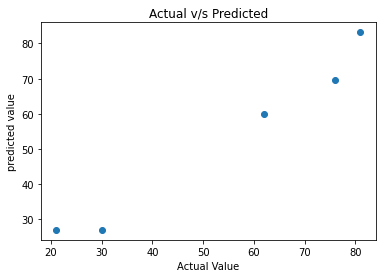

In [53]:
plt.scatter(newdf['Actual Value'],newdf['predicted Value'])
plt.xlabel('Actual Value')
plt.ylabel('predicted value')
plt.title('Actual v/s Predicted')

In [54]:
# Strength
newdf.corr()

,Actual Value,predicted Value
Actual Value,1.000000,0.985289
predicted Value,0.985289,1.000000


<AxesSubplot:>

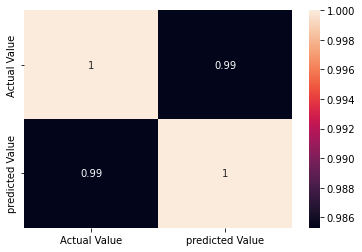

In [56]:
sns.heatmap(newdf.corr(),annot=True)

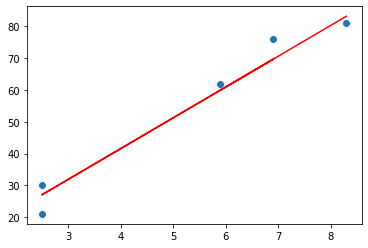

In [58]:
plt.scatter(X_test.Hours , y_test)
plt.plot(X_test.Hours , pred_y, color='red')

# Testing the model performance

In [59]:
r2_score(y_test, pred_y)

0.9678055545167994

#### 2. What will be the predicted score  if a student studies for 9.25 hours/day

In [61]:
model.predict([[9.25]])

c:\Users\Dr. Ajay Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.38611528])

### The predicted score if a student studies for 9.25 hrs/day is 92.38611528

# HEY!!! DONE BY JUNAID JAVED 